In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
import cv2
import glob

from tensorflow.keras.applications.resnet50 import ResNet50

## Dataset: https://www.kaggle.com/ravirajsinh45/real-life-industrial-dataset-of-casting-product

In [ ]:
'''import zipfile as zf
files = zf.ZipFile("casting.zip", 'r')
files.extractall()
files.close()'''

4.5.5


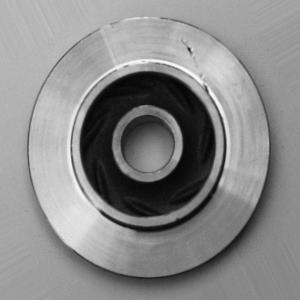

In [2]:
import cv2
print(cv2.__version__)
Image(filename='07.jpeg')

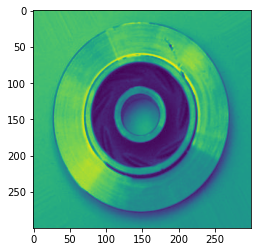

In [3]:
i= cv2.imread('07.jpeg',0)
plt.imshow(i)

In [4]:
train_def = [cv2.imread(file,0) for file in glob.glob('casting_data/casting_data/train/def_front/*.jpeg')]
train_ok = [cv2.imread(file,0) for file in glob.glob('casting_data/casting_data/train/ok_front/*.jpeg')]
test_def = [cv2.imread(file,0) for file in glob.glob('casting_data/casting_data/test/def_front/*.jpeg')]
test_ok = [cv2.imread(file,0) for file in glob.glob('casting_data/casting_data/test/ok_front/*.jpeg')]

In [5]:
print(len(train_def))
print(len(train_ok))
print(len(test_def))
print(len(test_ok))

3758
2875
453
262


In [6]:
y_train_def= np.array([1]*3758)
y_train_ok= np.array([0]*2875)
y_test_def= np.array([1]*453)
y_test_ok= np.array([0]*262)

In [7]:
def Edges(data):
    edge_detect=[]
    for i in range(len(data)):
        image=data[i]
        crop= image[20:280, 20:280]
        edges = cv2.Canny(image=crop, threshold1=100, threshold2=200)
        edge_detect.append(crop)
        
    return edge_detect

In [8]:
tr_ok_edge= Edges(train_ok)
tr_def_edge= Edges(train_def)
te_ok_edge= Edges(test_ok)
te_def_edge= Edges(test_def)

In [9]:
X_train= np.concatenate((tr_def_edge,tr_ok_edge))
X_test= np.concatenate((te_def_edge,te_ok_edge))

y_train= np.concatenate((y_train_def,y_train_ok))
y_test= np.concatenate((y_test_def,y_test_ok))
y_train.shape

(6633,)

In [199]:
print(type(X_train[0]))

<class 'numpy.ndarray'>


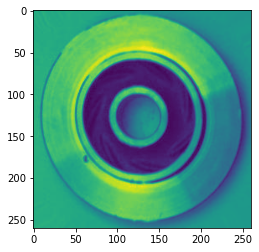

In [10]:
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
plt.imshow(X_train[0])

In [11]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [ ]:
#importing the required libraries

#loading data
#(X_train,y_train) , (X_test,y_test)=mnist.load_data()
#reshaping data
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test1 = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1)) 
#checking the shape after reshaping
print(X_train1.shape)
print(X_test1.shape)
#normalizing the pixel values
X_train1=X_train1/255
X_test1=X_test1/255
#defining model
model=Sequential()
#adding convolution layer
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(260,260,1)))
model.add(Conv2D(16,(3,3),activation='relu'))
#adding pooling layer
#model.add(BatchNormalization(axis = 3, name = 'bn0'))
model.add(MaxPool2D(4,4))
model.add(Conv2D(16,(3,3),activation='relu'))
#adding fully connected layer
model.add(Flatten())
model.add(Dense(10,activation='relu'))
#adding output layer
model.add(Dense(5,activation='sigmoid'))
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#fitting the model
model.fit(X_train1,y_train,epochs=5)

(6633, 260, 260, 1)
(715, 260, 260, 1)
Epoch 1/5
 56/208 [=======>......................] - ETA: 5:47 - loss: 0.6569 - accuracy: 0.6317

In [180]:
model.evaluate(X_test1,y_test)

23/23 [==============================] - 20s 848ms/step - loss: 0.0524 - accuracy: 0.9832


[0.05239734426140785, 0.9832167625427246]

Text(69.0, 0.5, 'Truth')

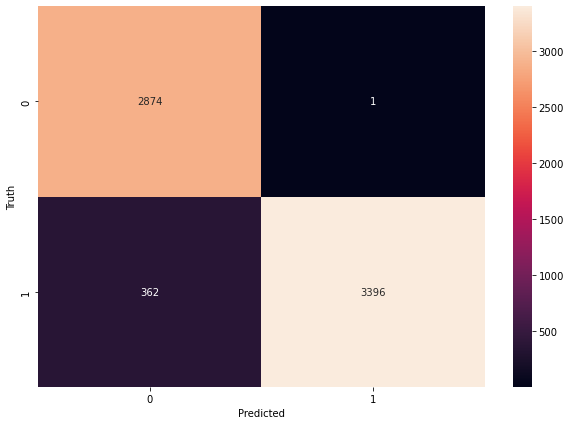

In [202]:
y_predicted = model.predict(X_train1)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

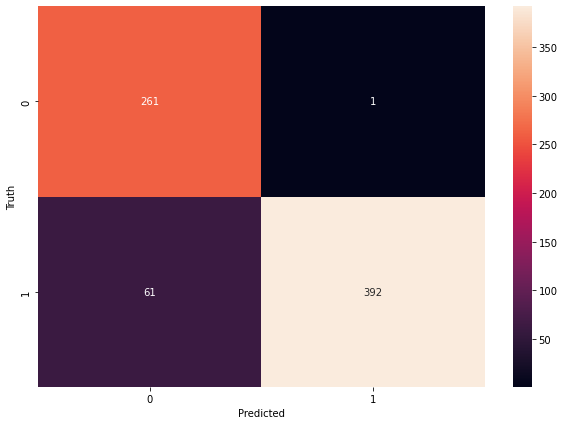

In [203]:
y_predicted = model.predict(X_test1)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [204]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 258, 258, 16)      160       
                                                                 
 conv2d_19 (Conv2D)          (None, 256, 256, 16)      2320      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 62, 62, 16)        2320      
                                                                 
 flatten_6 (Flatten)         (None, 61504)             0         
                                                                 
 dense_12 (Dense)            (None, 10)                615050    
                                                      

In [205]:

model.save("cnn_cast2.h5")
#loss, accuracy = loaded_model.evaluate(test_data, test_targets)

Text(69.0, 0.5, 'Truth')

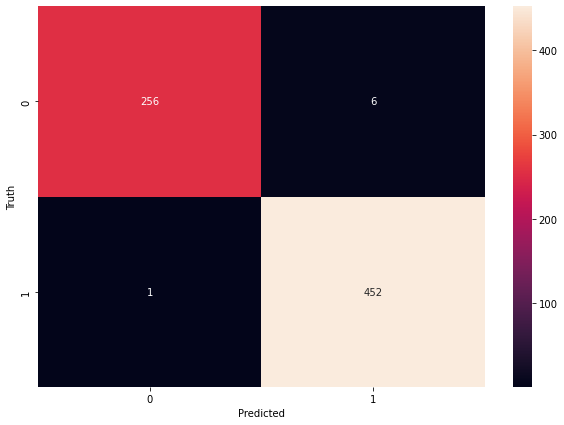

In [218]:
X_test1 = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))
cnn_model = load_model("cnn_cast.h5")
y_predicted = cnn_model.predict(X_test1)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [207]:
%%time
# source: https://www.geeksforgeeks.org/extract-images-from-video-in-python/

import os
  
# Read the video from specified path
cam = cv2.VideoCapture("video2.mp4")
  
try:
      
    # creating a folder named data
    if not os.path.exists('video_test'):
        os.makedirs('video_test')
  #if not created then raise error
except OSError:
    print ('Error: Creating directory of data')
  # frame
currentframe =10
  
while(True):
      
    # reading from frame
    ret,frame = cam.read()
  
    if ret:
        # if video is still left continue creating images
        name = './video_test/frames' + str(currentframe) + '.jpeg'
        print ('Creating...' + name)
  
        # writing the extracted images
        cv2.imwrite(name, frame)
  
        # increasing counter so that it will
        # show how many frames are created
        currentframe += 1
    else:
        break
  # Release all space and windows once done
cam.release()
cv2.destroyAllWindows()

Creating..../video_test/frames10.jpeg
Creating..../video_test/frames11.jpeg
Creating..../video_test/frames12.jpeg
Creating..../video_test/frames13.jpeg
Creating..../video_test/frames14.jpeg
Creating..../video_test/frames15.jpeg
Creating..../video_test/frames16.jpeg
Creating..../video_test/frames17.jpeg
Creating..../video_test/frames18.jpeg
Creating..../video_test/frames19.jpeg
Creating..../video_test/frames20.jpeg
Creating..../video_test/frames21.jpeg
Creating..../video_test/frames22.jpeg
Creating..../video_test/frames23.jpeg
Creating..../video_test/frames24.jpeg
Creating..../video_test/frames25.jpeg
Creating..../video_test/frames26.jpeg
Creating..../video_test/frames27.jpeg
Creating..../video_test/frames28.jpeg
Creating..../video_test/frames29.jpeg
Creating..../video_test/frames30.jpeg
Creating..../video_test/frames31.jpeg
Creating..../video_test/frames32.jpeg
Creating..../video_test/frames33.jpeg
Creating..../video_test/frames34.jpeg
Creating..../video_test/frames35.jpeg
Creating....

In [209]:
%%time
vid_img= [cv2.imread(file,0) for file in glob.glob('video_test/*.jpeg')]
print(len(vid_img))
vid = Edges(vid_img)
vid1 = np.array(vid)
vid_mod= vid1.reshape((vid1.shape[0],vid1.shape[1],vid1.shape[2],1)) 

200
Wall time: 411 ms


In [214]:
%%time
cnn_model = load_model("cnn_cast.h5")
y_predicted = cnn_model.predict(vid_mod)

Wall time: 4.03 s


In [215]:
%%time
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels

Wall time: 3.99 ms


[1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0]